# Final Project Template

This workbook provides the template for the final project. 

## Instructions
- Work individually or in pairs
- Each team is to complete 1 copy of this template.
  - Complete all sections.
  - Feel free to include supporting material / slides / documents as needed.
- At the end of the project, you will get 15 minutes to present this workbook to the class.

### Submission Instructions
- Submit the .ipynb with the Output cells showing the results
  - Naming convention:
  ```
      <name1>-<name2>-<project_short_name>.ipynb
  ```
- If you provide your own datasets, include the data with your .ipynb, unless it is confidential

## Section 0: Team Members
- Eugene Low

## Section 1: Project Title

- Weather Prediction using historical data

## Section 2: Project Definition

### Goals

Describe the goal of this project.

Example:
The goal of this project is to determine if the bid quotas and premiums can be > used to predict the vehicle category.

Important:
- If this is your first project, keep the project definition as simple as possible. 
- As a rule of thumb, pick something that can be completed in 1 day. But you can always pick a more complex project (no penalty)
- If you are not sure, use the workshop problems as a reference.

### Dataset

Briefly describe the source(s) of data you are using.
- Provide the URL to the data source.
- If you are providing your own data set, include the data with your project submission, unless the data is confidential.
- Describe the attributes of the dataset and the target variable (if any)

### Tasks

List the tasks you will perform. 

Example:
 
1. Process the dataset to convert strings into labels.
2. Shuffle and split into train and test sets
3. Train a classification model, using algorithm A, B, C...
4. Compute the metrics for the algorithm.
5. Perform analysis for possible improvements.

## Section 3: Data Engineering

Consider:
* Data Cleaning
* Data Exploration
* Imbalance / Data Sampling
* Data Encoding

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import pickle
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_completeness_v_measure

%matplotlib inline

In [89]:
df = pd.read_csv('WeatherFullDatasetClass_Jan2014_Oct2018.csv')
df.info()
# total of 26869 rows of data (14 Columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26869 entries, 0 to 26868
Data columns (total 13 columns):
Station                     26869 non-null object
Year                        26869 non-null int64
Month                       26869 non-null int64
Day                         26869 non-null int64
Highest_30_Min_Rainfall     26869 non-null object
Highest_60_Min_Rainfall     26869 non-null object
Highest_120_Min_Rainfall    26869 non-null object
Mean_Temperature            26869 non-null object
Maximum_Temperature         26869 non-null object
Minimum_Temperature         26869 non-null object
Mean_Wind_Speed             26869 non-null object
Max_Wind_Speed              26869 non-null object
Rain_Type                   26869 non-null object
dtypes: int64(3), object(10)
memory usage: 2.7+ MB


In [90]:
df['Highest_30_Min_Rainfall'] = pd.to_numeric(df.Highest_30_Min_Rainfall, errors = 'coerce')
df['Highest_60_Min_Rainfall'] = pd.to_numeric(df.Highest_60_Min_Rainfall, errors = 'coerce')
df['Highest_120_Min_Rainfall'] = pd.to_numeric(df.Highest_120_Min_Rainfall, errors = 'coerce')
df['Mean_Temperature'] = pd.to_numeric(df.Mean_Temperature, errors = 'coerce')
df['Maximum_Temperature'] = pd.to_numeric(df.Maximum_Temperature, errors = 'coerce')
df['Minimum_Temperature'] = pd.to_numeric(df.Minimum_Temperature, errors = 'coerce')
df['Mean_Wind_Speed'] = pd.to_numeric(df.Mean_Wind_Speed, errors = 'coerce')
df['Max_Wind_Speed'] = pd.to_numeric(df.Max_Wind_Speed, errors = 'coerce')
#df.dtypes

In [91]:
# to drop 1599 row due to NaN Values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25270 entries, 0 to 26868
Data columns (total 13 columns):
Station                     25270 non-null object
Year                        25270 non-null int64
Month                       25270 non-null int64
Day                         25270 non-null int64
Highest_30_Min_Rainfall     25270 non-null float64
Highest_60_Min_Rainfall     25270 non-null float64
Highest_120_Min_Rainfall    25270 non-null float64
Mean_Temperature            25270 non-null float64
Maximum_Temperature         25270 non-null float64
Minimum_Temperature         25270 non-null float64
Mean_Wind_Speed             25270 non-null float64
Max_Wind_Speed              25270 non-null float64
Rain_Type                   25270 non-null object
dtypes: float64(8), int64(3), object(2)
memory usage: 2.7+ MB


In [92]:
#df['Rain_Type'].unique()

In [93]:
#df['Station'].unique()

In [94]:
le = LabelEncoder()
df['Rain_Type'] = le.fit_transform(df.Rain_Type)
print(le.classes_)
# ['None' = 3, 'Light' = 1, 'Moderate' = 2, 'Heavy' = 0]

df['Station'] = le.fit_transform(df.Station)
print(le.classes_)
# ['Admiralty' = 0 'Ang Mo Kio' = 1 'Boon Lay (East)' = 2 'Changi' = 3
# 'Choa Chu Kang (South)' = 4 'Clementi' = 5 'East Coast Parkway' = 6 'Jurong (West)' = 7
# 'Jurong Island' = 8 'Khatib' = 9 'Marina Barrage' = 10 'Newton' = 11 'Pasir Panjang' = 12
# 'Sentosa Island' = 13 'Tai Seng' = 14 'Tuas South' = 15]

['Heavy' 'Light' 'Moderate' 'None']
['Admiralty' 'Ang Mo Kio' 'Boon Lay (East)' 'Changi'
 'Choa Chu Kang (South)' 'Clementi' 'East Coast Parkway' 'Jurong (West)'
 'Jurong Island' 'Khatib' 'Marina Barrage' 'Newton' 'Pasir Panjang'
 'Sentosa Island' 'Tai Seng' 'Tuas South']


In [95]:
#df['Rain_Type'].unique()

In [96]:
#df['Station'].unique()

In [97]:
df.corr()

Station      Year     Month       Day  \
Station                   1.000000  0.024422  0.004979  0.000275   
Year                      0.024422  1.000000 -0.059438  0.000070   
Month                     0.004979 -0.059438  1.000000  0.008948   
Day                       0.000275  0.000070  0.008948  1.000000   
Highest_30_Min_Rainfall  -0.011430  0.018116  0.078208  0.007551   
Highest_60_Min_Rainfall  -0.011202  0.019311  0.074818  0.006071   
Highest_120_Min_Rainfall -0.010131  0.021699  0.071534  0.003747   
Mean_Temperature          0.137072 -0.022520  0.118236 -0.005068   
Maximum_Temperature      -0.038462 -0.031787 -0.017404  0.012802   
Minimum_Temperature       0.171509  0.003862  0.070180  0.002378   
Mean_Wind_Speed          -0.010567 -0.010947 -0.167230  0.012241   
Max_Wind_Speed           -0.053295 -0.002140 -0.039959  0.022478   
Rain_Type                 0.018700 -0.062096 -0.102686  0.006789   

                          Highest_30_Min_Rainfall  Highest_60_Min_Rainfall  \
Station                                 -0.011430                -0.011202   
Year                                     0.018116                 0.019311   
Month                                    0.078208                 0.074818   
Day                                      0.007551                 0.006071   
Highest_30_Min_Rainfall                  1.000000                 0.984252   
Highest_60_Min_Rainfall                  0.984252                 1.000000   
Highest_120_Min_Rainfall                 0.963789                 0.988037   
Mean_Temperature                        -0.316820                -0.319497   
Maximum_Temperature                     -0.132422                -0.139728   
Minimum_Temperature                     -0.499635                -0.495671   
Mean_Wind_Speed                         -0.185289                -0.179518   
Max_Wind_Speed                           0.232569                 0.230458   
Rain_Type                               -0.656351                -0.642798   

                          Highest_120_Min_Rainfall  Mean_Temperature  \
Station                                  -0.010131          0.137072   
Year                                      0.021699         -0.022520   
Month                                     0.071534          0.118236   
Day                                       0.003747         -0.005068   
Highest_30_Min_Rainfall                   0.963789         -0.316820   
Highest_60_Min_Rainfall                   0.988037         -0.319497   
Highest_120_Min_Rainfall                  1.000000         -0.330480   
Mean_Temperature                         -0.330480          1.000000   
Maximum_Temperature                      -0.153264          0.660678   
Minimum_Temperature                      -0.495188          0.800309   
Mean_Wind_Speed                          -0.176938          0.108274   
Max_Wind_Speed                            0.228011         -0.163473   
Rain_Type                                -0.638712          0.440365   

                          Maximum_Temperature  Minimum_Temperature  \
Station                             -0.038462             0.171509   
Year                                -0.031787             0.003862   
Month                               -0.017404             0.070180   
Day                                  0.012802             0.002378   
Highest_30_Min_Rainfall             -0.132422            -0.499635   
Highest_60_Min_Rainfall             -0.139728            -0.495671   
Highest_120_Min_Rainfall            -0.153264            -0.495188   
Mean_Temperature                     0.660678             0.800309   
Maximum_Temperature                  1.000000             0.378373   
Minimum_Temperature                  0.378373             1.000000   
Mean_Wind_Speed                     -0.138917             0.203035   
Max_Wind_Speed                      -0.208526            -0.247106   
Rain_Type                            0.281794             0.53

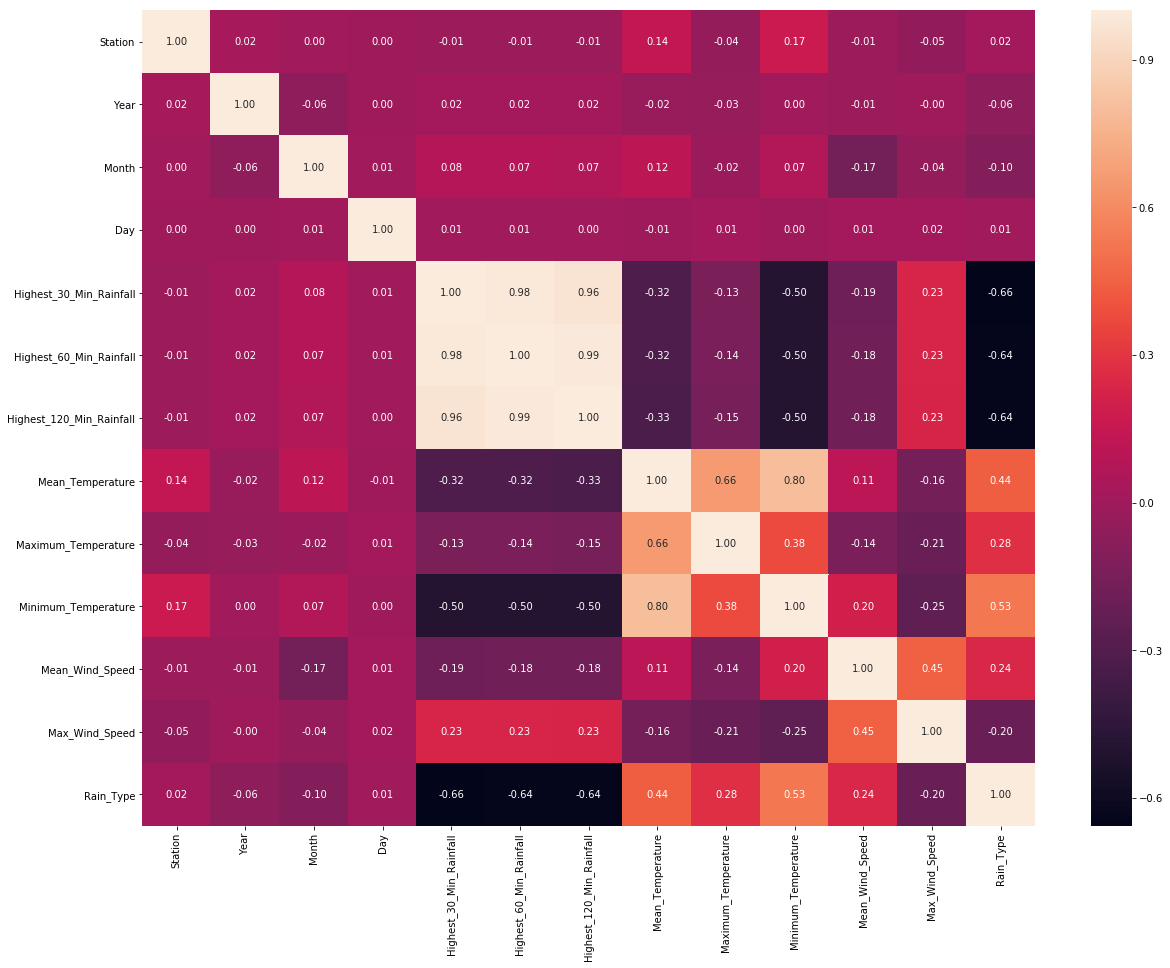

In [98]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax)

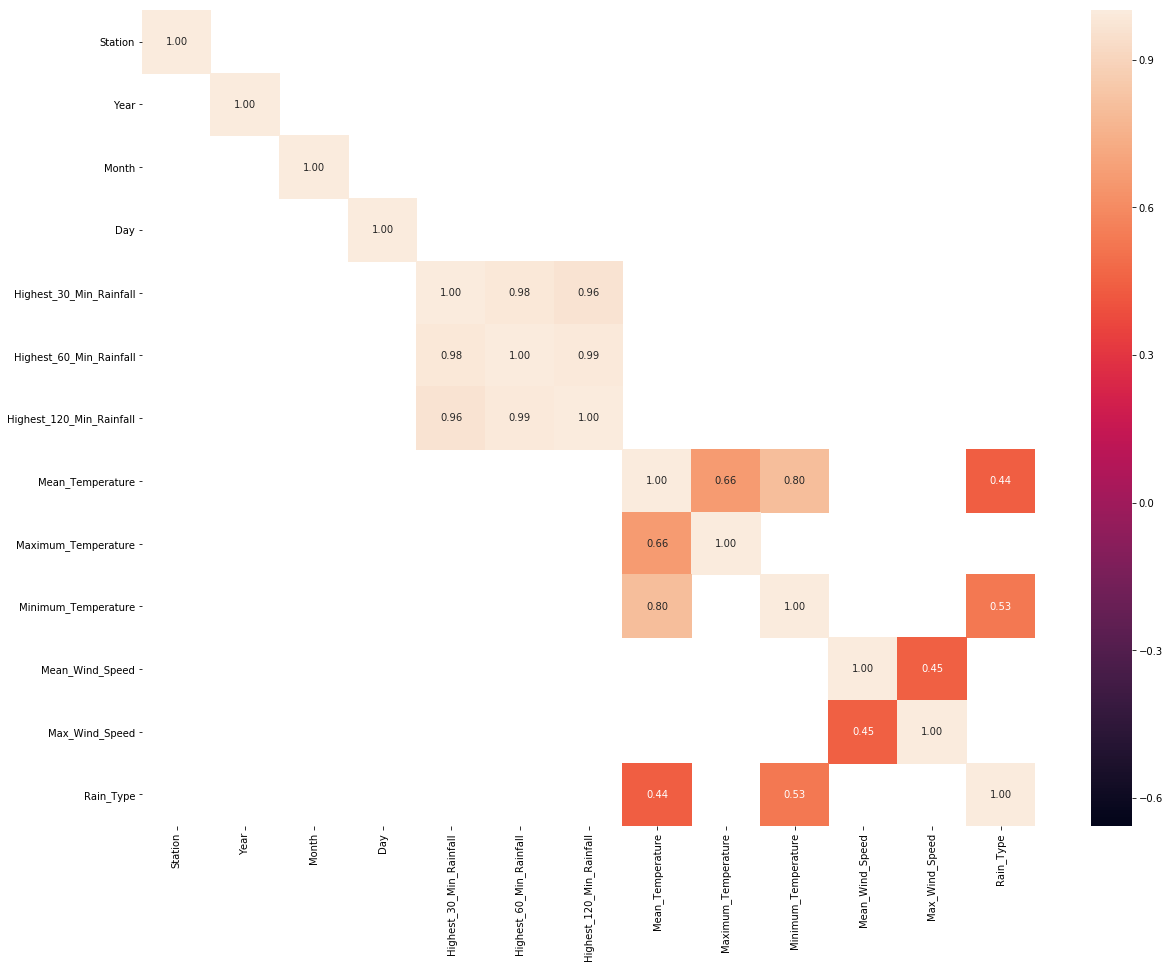

In [99]:
min_corr_threshold = 0.4
corr = df.corr()

# mask out correlations that are below high_threshold
high_corrs = corr[corr > min_corr_threshold]
high_mask = pd.DataFrame(high_corrs).isnull()

fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', ax=ax, mask=high_mask)

## Section 4: Feature Engineering

Consider:
* Feature Reduction
* PCA plot in 2D

In [100]:
target = 'Rain_Type'
features = (df.columns != target) 

In [101]:
X = df.loc[:, features]
y = df.loc[:, target]
print(df.shape, X.shape, y.shape)
print(y.value_counts())

(25270, 13) (25270, 12) (25270,)
3    12939
1     6410
0     3953
2     1968
Name: Rain_Type, dtype: int64


In [102]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca_2d = PCA(n_components=2)
Z_2d = pca_2d.fit_transform(X_scaled)

#print(sum(pca_2d.explained_variance_ratio_))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


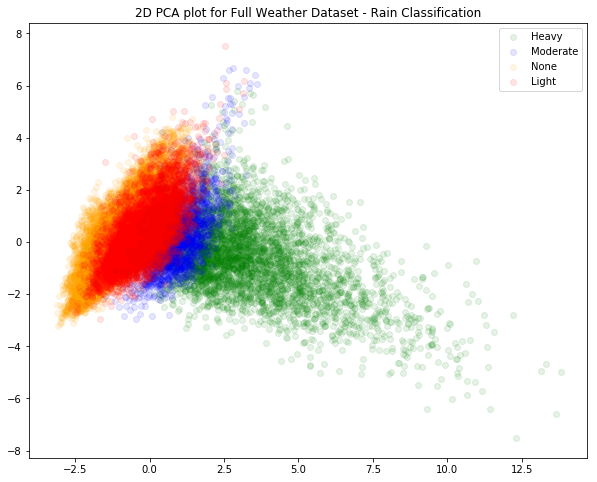

In [103]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(Z_2d[y==0, 0], Z_2d[y==0, 1], color='g', label='Heavy', alpha=.1)
#ax.scatter(Z_2d[y==1, 0], Z_2d[y==1, 1], color='r', label='Yes', alpha=.1)
ax.scatter(Z_2d[y==2, 0], Z_2d[y==2, 1], color='b', label='Moderate', alpha=.1)
ax.scatter(Z_2d[y==3, 0], Z_2d[y==3, 1], color='orange', label='None', alpha=.1)

ax.scatter(Z_2d[y==1, 0], Z_2d[y==1, 1], color='r', label='Light', alpha=.1)

ax.set(title='2D PCA plot for Full Weather Dataset - Rain Classification')
ax.legend()
plt.show()

[Text(0, 0.5, 'Inter-cluster distance'), Text(0.5, 1.0, 'Dendrogram')]

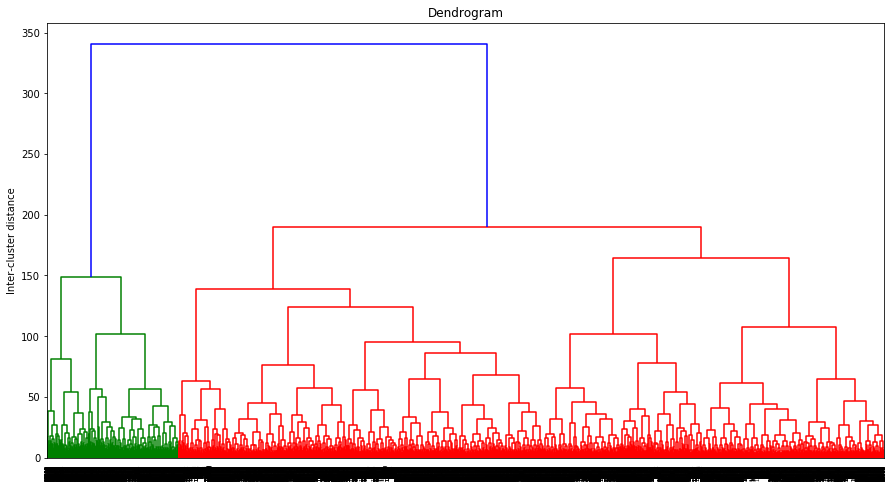

In [104]:
#Cluster analysis for Decision Tree
links = linkage(X_scaled, 'ward')

fig, ax = plt.subplots(figsize=(15, 8))
dendrogram(links, ax=ax)

ax.set(title='Dendrogram', ylabel='Inter-cluster distance')

In [105]:
#agg = AgglomerativeClustering(n_clusters=2)
#clusters = agg.fit_predict(X_scaled)

#from sklearn.metrics import silhouette_score
#print(silhouette_score(X_scaled, clusters))

#print(homogeneity_completeness_v_measure(y, clusters))

In [106]:
#Prep data for training and validation

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [108]:
#print(df.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#print(y.value_counts())
#print(y_train.value_counts())
#print(y_test.value_counts())

In [109]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)

Z_train = X_scaler.transform(X_train)
Z_test = X_scaler.transform(X_test)

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [110]:
sgd = SGDClassifier(tol=1e-3, random_state=42, max_iter=200)
sgd.fit(Z_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=200,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [111]:
svc = SVC(gamma='auto', random_state=42, kernel='rbf')
svc.fit(Z_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
dtc = DecisionTreeClassifier(random_state=42,max_features='auto',class_weight='balanced')
dtc.fit(Z_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

## Section 5: Model Engineering

Consider:
* Learning Curve to avoid Overfitting

In [113]:
#SGD Learning Curve

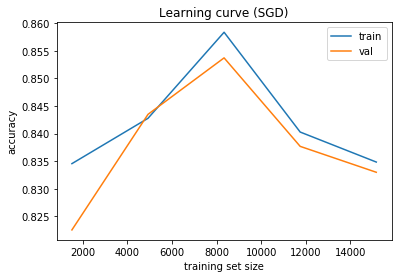

In [114]:
train_sizes, train_scores, val_scores = learning_curve(sgd, Z_train, y_train, cv=5)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')

# learning curve plots scores (accuracy) vs. training set sizes
ax.set(title='Learning curve (SGD)', xlabel='training set size', ylabel='accuracy')
ax.legend()

In [115]:
#SVC Learning Curve

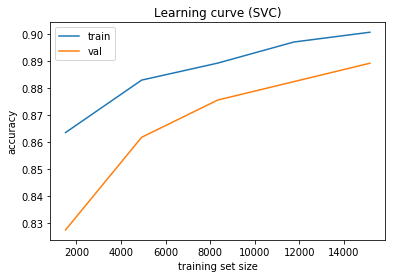

In [116]:
train_sizes, train_scores, val_scores = learning_curve(svc, Z_train, y_train, cv=5)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')

ax.set(title='Learning curve (SVC)', xlabel='training set size', ylabel='accuracy')
ax.legend()

In [117]:
#Decision Tree Learning Curve

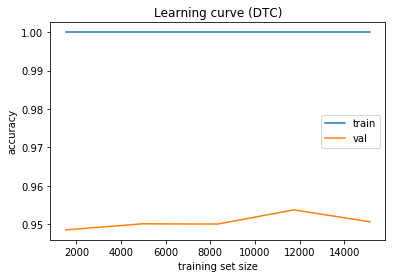

In [118]:
train_sizes, train_scores, val_scores = learning_curve(dtc, Z_train, y_train, cv=5)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_scores.mean(axis=1), label='train')
ax.plot(train_sizes, val_scores.mean(axis=1), label='val')

# learning curve plots scores (accuracy) vs. training set sizes
ax.set(title='Learning curve (DTC)', xlabel='training set size', ylabel='accuracy')
ax.legend()

## Section 6: Evaluate Metrics

Consider:
* Which metric to use?

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       998
           1       0.79      0.73      0.76      1607
           2       0.50      0.16      0.24       484
           3       0.90      1.00      0.95      3229

   micro avg       0.86      0.86      0.86      6318
   macro avg       0.77      0.72      0.72      6318
weighted avg       0.84      0.86      0.84      6318



[Text(0, 0.5, 'Heavy'),
 Text(0, 1.5, 'Moderate'),
 Text(0, 2.5, 'Light'),
 Text(0, 3.5, 'None')]

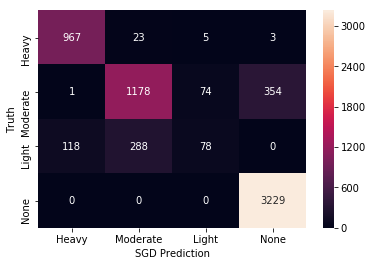

In [119]:
pred_sgd = sgd.predict(Z_test)
print(classification_report(y_test, pred_sgd))

ax = sns.heatmap(confusion_matrix(y_test, pred_sgd), annot=True, fmt='d')
ax.set(xlabel='SGD Prediction', ylabel='Truth')
ax.xaxis.set_ticklabels(['Heavy', 'Moderate', 'Light', 'None'])
ax.yaxis.set_ticklabels(['Heavy', 'Moderate', 'Light', 'None'])

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       998
           1       0.92      0.71      0.80      1607
           2       0.76      0.74      0.75       484
           3       0.88      1.00      0.94      3229

   micro avg       0.89      0.89      0.89      6318
   macro avg       0.88      0.84      0.86      6318
weighted avg       0.90      0.89      0.89      6318



[Text(0, 0.5, 'Heavy'),
 Text(0, 1.5, 'Moderate'),
 Text(0, 2.5, 'Light'),
 Text(0, 3.5, 'None')]

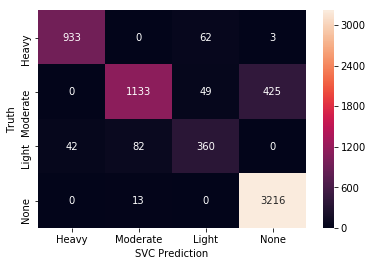

In [120]:
pred_svc = svc.predict(Z_test)
print(classification_report(y_test, pred_svc))

ax = sns.heatmap(confusion_matrix(y_test, pred_svc), annot=True, fmt='d')
ax.set(xlabel='SVC Prediction', ylabel='Truth')
ax.xaxis.set_ticklabels(['Heavy', 'Moderate', 'Light', 'None'])
ax.yaxis.set_ticklabels(['Heavy', 'Moderate', 'Light', 'None'])

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       998
           1       0.95      0.95      0.95      1607
           2       0.71      0.69      0.70       484
           3       1.00      1.00      1.00      3229

   micro avg       0.95      0.95      0.95      6318
   macro avg       0.90      0.89      0.89      6318
weighted avg       0.95      0.95      0.95      6318



[Text(0, 0.5, 'Heavy'),
 Text(0, 1.5, 'Moderate'),
 Text(0, 2.5, 'Light'),
 Text(0, 3.5, 'None')]

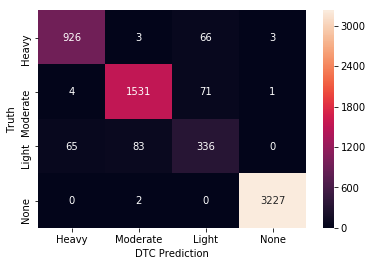

In [121]:
pred_dtc = dtc.predict(Z_test)
print(classification_report(y_test, pred_dtc))

ax = sns.heatmap(confusion_matrix(y_test, pred_dtc), annot=True, fmt='d')
ax.set(xlabel='DTC Prediction', ylabel='Truth')
ax.xaxis.set_ticklabels(['Heavy', 'Moderate', 'Light', 'None'])
ax.yaxis.set_ticklabels(['Heavy', 'Moderate', 'Light', 'None'])

In [122]:
#pickle.dump(X_scaler, open('Weather_FullData_Class_X_scaler.pickle', 'wb'))
#pickle.dump(sgd, open('Weather_FullData_Class_sgd.pickle', 'wb'))
#pickle.dump(svc, open('Weather_FullData_Class_svc.pickle', 'wb'))
#pickle.dump(dtc, open('Weather_FullData_Class_dtc.pickle', 'wb'))

In [123]:
#pickle.dump(X_scaler, open('Weather_FullData_Class_X_scaler.pickle', 'wb'))
#pickle.dump(sgd, open('Weather_FullData_Class_sgd.pickle', 'wb'))
#pickle.dump(svc, open('Weather_FullData_Class_svc.pickle', 'wb'))
#pickle.dump(dtc, open('Weather_FullData_Class_dtc.pickle', 'wb'))

In [124]:
print(X_test.shape, y_test.shape)
print(y.value_counts())
#print(y_train.value_counts())
print(y_test.value_counts())

(6318, 12) (6318,)
3    12939
1     6410
0     3953
2     1968
Name: Rain_Type, dtype: int64
3    3229
1    1607
0     998
2     484
Name: Rain_Type, dtype: int64


In [125]:
#Validate with SGD

In [160]:
test_data_heavy = X_test.loc[y_test == 0]
test_targets_heavy = y_test.loc[y_test == 0]

Z_test_heavy = X_scaler.transform(test_data_heavy)
y_pred_test_heavy = sgd.predict(Z_test_heavy)

print('Truth', test_targets_heavy.values)
print('Predictions', y_pred_test_heavy.flatten())
print('Accuracy', accuracy_score(test_targets_heavy.values, y_pred_test_heavy))

Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [127]:
test_data_mod = X_test.loc[y_test == 1]
test_targets_mod = y_test.loc[y_test == 1]

Z_test_mod = X_scaler.transform(test_data_mod)
y_pred_test_mod = sgd.predict(Z_test_mod)

print('Truth', test_targets_mod.values)
print('Predictions', y_pred_test_mod.flatten())
print('Accuracy', accuracy_score(test_targets_mod.values, y_pred_test_mod))

Truth [1 1 1 ... 1 1 1]
Predictions [1 1 1 ... 1 1 1]
Accuracy 0.7330429371499689


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [128]:
test_data_light = X_test.loc[y_test == 2]
test_targets_light = y_test.loc[y_test == 2]

Z_test_light = X_scaler.transform(test_data_light)
y_pred_test_light = sgd.predict(Z_test_light)

print('Truth', test_targets_light.values)
print('Predictions', y_pred_test_light.flatten())
print('Accuracy', accuracy_score(test_targets_light.values, y_pred_test_light))

Truth [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]
Predictions

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [129]:
test_data_none = X_test.loc[y_test == 3]
test_targets_none = y_test.loc[y_test == 3]

Z_test_none = X_scaler.transform(test_data_none)
y_pred_test_none = sgd.predict(Z_test_none)

print('Truth', test_targets_none.values)
print('Predictions', y_pred_test_none.flatten())
print('Accuracy', accuracy_score(test_targets_none.values, y_pred_test_none))

Truth [3 3 3 ... 3 3 3]
Predictions [3 3 3 ... 3 3 3]
Accuracy 1.0


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [130]:
#Validate with SVC

In [131]:
test_data_heavy = X_test.loc[y_test == 0]
test_targets_heavy = y_test.loc[y_test == 0]

Z_test_heavy = X_scaler.transform(test_data_heavy)
y_pred_test_heavy = svc.predict(Z_test_heavy)

print('Truth', test_targets_heavy.values)
print('Predictions', y_pred_test_heavy.flatten())
print('Accuracy', accuracy_score(test_targets_heavy.values, y_pred_test_heavy))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

In [132]:
test_data_mod = X_test.loc[y_test == 1]
test_targets_mod = y_test.loc[y_test == 1]

Z_test_mod = X_scaler.transform(test_data_mod)
y_pred_test_mod = svc.predict(Z_test_mod)

print('Truth', test_targets_mod.values)
print('Predictions', y_pred_test_mod.flatten())
print('Accuracy', accuracy_score(test_targets_mod.values, y_pred_test_mod))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Truth [1 1 1 ... 1 1 1]
Predictions [1 3 1 ... 3 1 1]
Accuracy 0.7050404480398258


In [133]:
test_data_light = X_test.loc[y_test == 2]
test_targets_light = y_test.loc[y_test == 2]

Z_test_light = X_scaler.transform(test_data_light)
y_pred_test_light = svc.predict(Z_test_light)

print('Truth', test_targets_light.values)
print('Predictions', y_pred_test_light.flatten())
print('Accuracy', accuracy_score(test_targets_light.values, y_pred_test_light))

Truth [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]
Predictions

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [134]:
test_data_none = X_test.loc[y_test == 3]
test_targets_none = y_test.loc[y_test == 3]

Z_test_none = X_scaler.transform(test_data_none)
y_pred_test_none = svc.predict(Z_test_none)

print('Truth', test_targets_none.values)
print('Predictions', y_pred_test_none.flatten())
print('Accuracy', accuracy_score(test_targets_none.values, y_pred_test_none))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Truth [3 3 3 ... 3 3 3]
Predictions [3 3 3 ... 3 3 3]
Accuracy 0.9959739857541035


In [135]:
#Validate with DTC

In [136]:
test_data_heavy = X_test.loc[y_test == 0]
test_targets_heavy = y_test.loc[y_test == 0]

Z_test_heavy = X_scaler.transform(test_data_heavy)
y_pred_test_heavy = dtc.predict(Z_test_heavy)

print('Truth', test_targets_heavy.values)
print('Predictions', y_pred_test_heavy.flatten())
print('Accuracy', accuracy_score(test_targets_heavy.values, y_pred_test_heavy))

Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [137]:
test_data_mod = X_test.loc[y_test == 1]
test_targets_mod = y_test.loc[y_test == 1]

Z_test_mod = X_scaler.transform(test_data_mod)
y_pred_test_mod = dtc.predict(Z_test_mod)

print('Truth', test_targets_mod.values)
print('Predictions', y_pred_test_mod.flatten())
print('Accuracy', accuracy_score(test_targets_mod.values, y_pred_test_mod))

Truth [1 1 1 ... 1 1 1]
Predictions [1 1 1 ... 1 1 1]
Accuracy 0.9527069072806472


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [138]:
test_data_light = X_test.loc[y_test == 2]
test_targets_light = y_test.loc[y_test == 2]

Z_test_light = X_scaler.transform(test_data_light)
y_pred_test_light = dtc.predict(Z_test_light)

print('Truth', test_targets_light.values)
print('Predictions', y_pred_test_light.flatten())
print('Accuracy', accuracy_score(test_targets_light.values, y_pred_test_light))

Truth [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]
Predictions

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [139]:
test_data_none = X_test.loc[y_test == 3]
test_targets_none = y_test.loc[y_test == 3]

Z_test_none = X_scaler.transform(test_data_none)
y_pred_test_none = dtc.predict(Z_test_none)

print('Truth', test_targets_none.values)
print('Predictions', y_pred_test_none.flatten())
print('Accuracy', accuracy_score(test_targets_none.values, y_pred_test_none))

Truth [3 3 3 ... 3 3 3]
Predictions [3 3 3 ... 3 3 3]
Accuracy 0.999380613192939


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [140]:
# Prep Live Data

In [141]:
df_t = pd.read_csv('WeatherFullDatasetClass_Nov2018.csv')
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 13 columns):
Station                     427 non-null object
Year                        427 non-null int64
Month                       427 non-null int64
Day                         427 non-null int64
Highest_30_Min_Rainfall     427 non-null float64
Highest_60_Min_Rainfall     427 non-null float64
Highest_120_Min_Rainfall    427 non-null float64
Mean_Temperature            427 non-null float64
Maximum_Temperature         427 non-null float64
Minimum_Temperature         427 non-null float64
Mean_Wind_Speed             427 non-null float64
Max_Wind_Speed              427 non-null float64
Rain_Type                   427 non-null object
dtypes: float64(8), int64(3), object(2)
memory usage: 43.4+ KB


In [142]:
le = LabelEncoder()
df_t['Rain_Type'] = le.fit_transform(df_t.Rain_Type)
print(le.classes_)
# ['Heavy' = 3 'Light' = 1 'Moderate' = 2 'None' = 0]

df_t['Station'] = le.fit_transform(df_t.Station)
print(le.classes_)
# ['Admiralty' = 0 'Ang Mo Kio' = 1 'Boon Lay (East)' = 2 'Changi' = 3
# 'Choa Chu Kang (South)' = 4 'Clementi' = 5 'East Coast Parkway' = 6 'Jurong (West)' = 7
# 'Jurong Island' = 8 'Khatib' = 9 'Marina Barrage' = 10 'Newton' = 11 'Pasir Panjang' = 12
# 'Sentosa Island' = 13 'Tai Seng' = 14 'Tuas South' = 15]

['Heavy' 'Light' 'Moderate' 'None']
['Admiralty' 'Ang Mo Kio' 'Changi' 'Choa Chu Kang (South)' 'Clementi'
 'East Coast Parkway' 'Jurong (West)' 'Jurong Island' 'Khatib'
 'Marina Barrage' 'Newton' 'Pasir Panjang' 'Sentosa Island' 'Tai Seng'
 'Tuas South']


In [143]:
X_actual = df_t.loc[:, features]
y_actual = df_t.loc[:, target]
print(df_t.shape, X_actual.shape, y_actual.shape)
print(y_actual.value_counts())

(427, 13) (427, 12) (427,)
1    177
0    146
2     68
3     36
Name: Rain_Type, dtype: int64


In [144]:
#Prediction using SGD

In [145]:
actual_data_heavy = X_actual.loc[y_actual == 0]
actual_targets_heavy = y_actual.loc[y_actual == 0]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = sgd.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy 0.952054794520548


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [146]:
actual_data_mod = X_actual.loc[y_actual == 1]
actual_targets_mod = y_actual.loc[y_actual == 1]

Z_actual_mod = X_scaler.transform(actual_data_mod)
y_pred_actual_mod = sgd.predict(Z_actual_mod)

print('Truth', actual_targets_mod.values)
print('Predictions', y_pred_actual_mod.flatten())
print('Accuracy', accuracy_score(actual_targets_mod.values, y_pred_actual_mod))

Truth [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predictions [1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1
 1 3 3 3 1 1 1 1 1 3 1 3 3 1 1 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1
 3 3 3 1 3 1 1 1 1 1 3 1 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 3 3 3 1 1 1 1 1 1 1 1 3 1
 1 1 1 1 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 3 1 1 1 1 1]
Accuracy 0.7909604519774012


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [147]:
actual_data_mod = X_actual.loc[y_actual == 2]
actual_targets_mod = y_actual.loc[y_actual == 2]

Z_actual_mod = X_scaler.transform(actual_data_mod)
y_pred_actual_mod = sgd.predict(Z_actual_mod)

print('Truth', actual_targets_mod.values)
print('Predictions', y_pred_actual_mod.flatten())
print('Accuracy', accuracy_score(actual_targets_mod.values, y_pred_actual_mod))

Truth [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predictions [1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1]
Accuracy 0.014705882352941176


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [148]:
actual_data_mod = X_actual.loc[y_actual == 3]
actual_targets_mod = y_actual.loc[y_actual == 3]

Z_actual_mod = X_scaler.transform(actual_data_mod)
y_pred_actual_mod = sgd.predict(Z_actual_mod)

print('Truth', actual_targets_mod.values)
print('Predictions', y_pred_actual_mod.flatten())
print('Accuracy', accuracy_score(actual_targets_mod.values, y_pred_actual_mod))

Truth [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Predictions [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Accuracy 1.0


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [149]:
#Prediction using SVC

In [150]:
actual_data_heavy = X_actual.loc[y_actual == 0]
actual_targets_heavy = y_actual.loc[y_actual == 0]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = svc.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 2 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy 0.9246575342465754


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [151]:
actual_data_heavy = X_actual.loc[y_actual == 1]
actual_targets_heavy = y_actual.loc[y_actual == 1]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = svc.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

Truth [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predictions [1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 3 1 3 1 1 1 3 1 1 1 1 1 1 1 1 3 1 3
 1 3 3 3 2 1 1 1 1 3 1 3 3 1 1 3 3 3 1 1 1 1 1 1 1 3 1 1 3 1 3 1 1 1 1 3 1
 3 3 1 1 3 1 3 3 1 1 3 1 3 3 3 3 3 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 3
 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 3 3 3 3 1 1 1 1 1 1 1 1 3 1
 1 1 1 1 3 1 1 1 3 3 1 3 1 1 1 1 1 3 1 1 3 3 3 3 1 1 3 1 1]
Accuracy 0.6836158192090396


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [152]:
actual_data_heavy = X_actual.loc[y_actual == 2]
actual_targets_heavy = y_actual.loc[y_actual == 2]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = svc.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


Truth [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predictions [2 2 1 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 0 2 2
 2 2 2 2 0 2 0 2 1 2 2 2 0 2 2 1 0 2 2 2 0 2 2 2 2 2 2 2 1 1 1]
Accuracy 0.7352941176470589


In [153]:
actual_data_heavy = X_actual.loc[y_actual == 3]
actual_targets_heavy = y_actual.loc[y_actual == 3]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = svc.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

Truth [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Predictions [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Accuracy 1.0


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [154]:
#Prediction using DTC

In [155]:
actual_data_heavy = X_actual.loc[y_actual == 0]
actual_targets_heavy = y_actual.loc[y_actual == 0]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = dtc.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

Truth [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy 0.9452054794520548


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [156]:
actual_data_heavy = X_actual.loc[y_actual == 1]
actual_targets_heavy = y_actual.loc[y_actual == 1]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = dtc.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

Truth [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predictions [1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 3 3 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy 0.9152542372881356


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [157]:
actual_data_heavy = X_actual.loc[y_actual == 2]
actual_targets_heavy = y_actual.loc[y_actual == 2]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = dtc.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

Truth [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predictions [1 1 1 2 2 1 2 2 2 2 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 0 0 2 2 2 2 1 1 1 2 0 2
 2 0 2 2 2 2 2 2 1 2 2 2 0 2 0 1 0 2 2 2 0 2 2 2 2 2 2 2 1 1 1]
Accuracy 0.6323529411764706


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [158]:
actual_data_heavy = X_actual.loc[y_actual == 3]
actual_targets_heavy = y_actual.loc[y_actual == 3]

Z_actual_heavy = X_scaler.transform(actual_data_heavy)
y_pred_actual_heavy = dtc.predict(Z_actual_heavy)

print('Truth', actual_targets_heavy.values)
print('Predictions', y_pred_actual_heavy.flatten())
print('Accuracy', accuracy_score(actual_targets_heavy.values, y_pred_actual_heavy))

Truth [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Predictions [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Accuracy 1.0


C:\Users\Eugene Low\Anaconda3\envs\mldds\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Section 7: Observations and analysis

Answer the following questions:
1. What do you conclude from the metrics?

3. What improvements do you propose?

In [159]:
#Confusion Report on actual results

#actual_data = X_actual
#Z_actual = X_scaler_d.transform(actual_data)
#y_pred_actual = sgd_d.predict(Z_actual)

#print(classification_report(y_actual, y_pred_actual))

#ax = sns.heatmap(confusion_matrix(y_actual, y_pred_actual), annot=True, fmt='d')
#ax.set(xlabel='Prediction', ylabel='Truth')